**KELOMPOK 5**

- Muhammad Hafiizh Abdillah
- Rafi Erbakti

# Project Guideline

Hi teman-teman! Silakan menggunakan template notebook ini untuk mengerjakan projectmu.

<br>

**Informasi tambahan,**
1. Copy notebook ini untuk mulai mengerjakan Projectmu.
2. Kamu bebas untuk menambahkan cell pada notebook.

## Data Understanding

Menjelajahi struktur dan karakteristik dari sebuah data.

Menulis kode untuk mengkoneksikan notebook ke Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Memasukkan library yang akan kamu gunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
!ls '/content/drive/MyDrive/FIKTI - Data Science/group05/dataset'

Sleep_health_and_lifestyle_dataset.csv


Mengambil file .csv dari Google Drive kamu.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FIKTI - Data Science/group05/dataset/Sleep_health_and_lifestyle_dataset.csv', sep=',')

Menampilkan Jumlah Column


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Menampilkan Data Pengguna

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Menampilkan Jumlah Rows & Column

In [ ]:
df.shape

(374, 13)

Menampilkan data statistik deskriptif pada dataframe

In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## Data Cleaning

Menangani nilai yang hilang, outlier, dan mempersiapkan variabel.

In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.dropna(subset=['Sleep Disorder'], inplace=False)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 3 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                155 non-null    int64  
 1   Gender                   155 non-null    object 
 2   Age                      155 non-null    int64  
 3   Occupation               155 non-null    object 
 4   Sleep Duration           155 non-null    float64
 5   Quality of Sleep         155 non-null    int64  
 6   Physical Activity Level  155 non-null    int64  
 7   Stress Level             155 non-null    int64  
 8   BMI Category             155 non-null    object 
 9   Blood Pressure           155 non-null    object 
 10  Heart Rate               155 non-null    int64  
 11  Daily Steps              155 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 17.0+ KB
None


In [ ]:
df.drop(columns=['Person ID'], inplace=True)

In [ ]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
16,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
#Memisahkan kolom Blood Pressure menjadi Systolic dan Diastolic
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

In [ ]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
5,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,140,90
6,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,140,90
16,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea,132,87


In [ ]:
df['Systolic'] = df['Systolic'].astype(int)
df['Diastolic'] = df['Diastolic'].astype(int)

df.drop(columns=['Blood Pressure'], inplace=True)

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [ ]:
df = pd.get_dummies(df, columns=['Occupation', 'BMI Category', 'Sleep Disorder'])

In [ ]:
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic,...,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea
3,0,28,5.9,4,30,8,85,3000,140,90,...,False,False,False,False,False,False,True,False,False,True
4,0,28,5.9,4,30,8,85,3000,140,90,...,False,False,False,False,False,False,True,False,False,True
5,0,28,5.9,4,30,8,85,3000,140,90,...,False,False,True,False,False,False,True,False,True,False
6,0,29,6.3,6,40,7,82,3500,140,90,...,False,False,False,True,False,False,True,False,True,False
16,1,29,6.5,5,40,7,80,4000,132,87,...,False,False,False,False,False,True,False,False,False,True


## Exploratory Data Analysis

Memvisualisasikan hubungan, distribusi data, dan lain sebagainya.

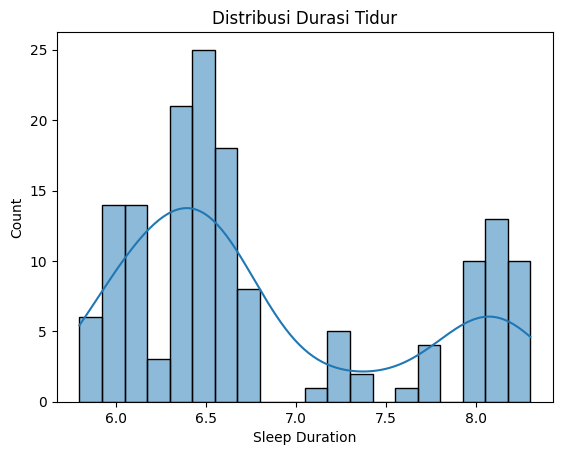

In [ ]:
sns.histplot(df['Sleep Duration'], bins=20, kde=True)
plt.title("Distribusi Durasi Tidur")
plt.show()

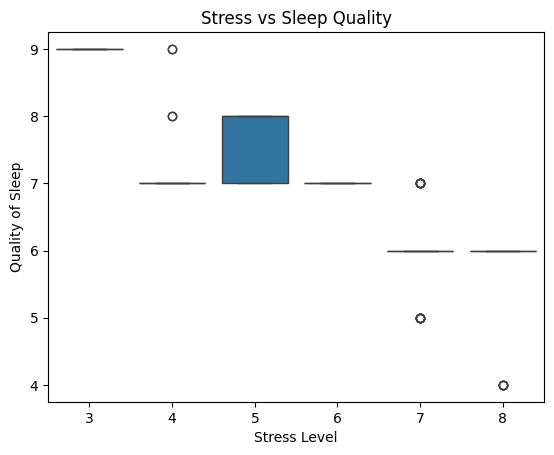

In [ ]:
sns.boxplot(x='Stress Level', y='Quality of Sleep', data=df)
plt.title("Stress vs Sleep Quality")
plt.show()

## Data Preparation

Memisahkan data training dan testing

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
            'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

## Model Building

Membuat regresi linier pada. Silakan mengeksplorasi dataset kamu terlebih dahulu dengan berbagai kombinasi prediktor.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[features]
y = df['Quality of Sleep']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg_model.predict(X_test)

## Evaluation

Melakukan evaluasi model yang telah dibuat menggunakan plot dan metrik evaluasi, serta tambahkan interpretasi hasilnya.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Koefisien:", reg_model.coef_)
print("Intercept:", reg_model.intercept_)
print("MAE:", mae)
print("MSE:", mse)
print("R-squared:", r2)

Koefisien: [2.73155496e-16 6.10622664e-16 1.00000000e+00 3.60822483e-16
 4.02455846e-16 1.11022302e-16 5.55111512e-17 1.11022302e-16
 2.77555756e-16]
Intercept: -5.551115123125783e-17
MAE: 6.688198382217677e-16
MSE: 7.625067283691064e-31
R-squared: 1.0
